# Iris Flower Classification Project Using Machine Learning


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 
df = pd.read_csv('IRIS.csv', names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,151,151,151,151,151
unique,36,24,44,23,4
top,5,3,1.5,0.2,Iris-setosa
freq,10,26,14,28,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  151 non-null    object
 1   sepal_width   151 non-null    object
 2   petal_length  151 non-null    object
 3   petal_width   151 non-null    object
 4   species       151 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [5]:
df = df.iloc[1:] 

In [6]:
df.shape

(150, 5)

In [7]:
df.size

750

Features of dataset

In [8]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [9]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

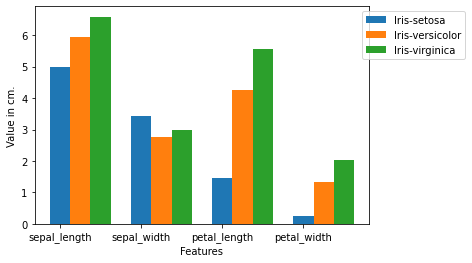

In [10]:
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Iris-setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Iris-versicolor')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Iris-virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<AxesSubplot:ylabel='Density'>

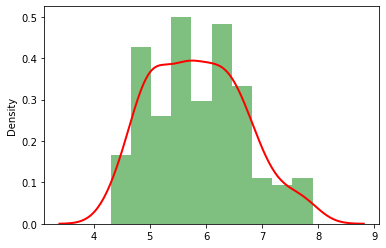

In [12]:
sns.distplot(x=df['sepal_length'], bins=10, color='green', hist_kws={'alpha': 0.5}, kde=True, kde_kws={'color': 'red', 'lw': 2})

<AxesSubplot:xlabel='species', ylabel='count'>

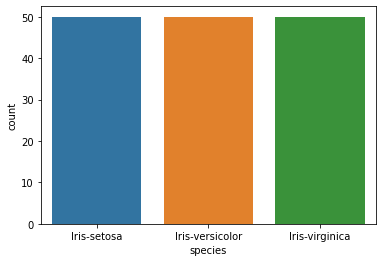

In [13]:
sns.countplot(df['species'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [16]:
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [20]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
